### Uploading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
part1 = pd.read_csv("loan-part-1.csv")

part2 = pd.read_csv("loan-part-2.csv")

In [6]:
#df = pd.read_csv('loan.csv')
df = pd.concat([part1, part2])
df.reset_index(drop=True, inplace=True)

df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


### Rectifing Data

The columns term and int_rate are of string type and we need to fetch only numbers from these column for analysis.

In [7]:
df['term'] = df['term'].str.replace('months','')
df['term'] = pd.to_numeric(df['term'])
df['term'][:10]

0    36
1    60
2    36
3    36
4    60
5    36
6    60
7    36
8    60
9    60
Name: term, dtype: int64

In [8]:
df['int_rate'] = df['int_rate'].str.replace('%','')
df['int_rate'] = pd.to_numeric(df['int_rate'])
df['int_rate'][:10]

0    10.65
1    15.27
2    15.96
3    13.49
4    12.69
5     7.90
6    15.96
7    18.64
8    21.28
9    12.69
Name: int_rate, dtype: float64

In [9]:
df.groupby('home_ownership').size()

home_ownership
MORTGAGE    17659
NONE            3
OTHER          98
OWN          3058
RENT        18899
dtype: int64

In [10]:
df = df.replace('NONE', np.nan)

### loan_status is our target column

In [11]:
df['loan_status'].describe()

count          39717
unique             3
top       Fully Paid
freq           32950
Name: loan_status, dtype: object

In [12]:
df.groupby('loan_status').size()

loan_status
Charged Off     5627
Current         1140
Fully Paid     32950
dtype: int64

Removing all the rows where loan_status is current since we don't need analyse those rows

In [13]:
indexTodrop = []
for n in df.loan_status.index:
    if df.loan_status[n] == 'Current':
        indexTodrop.append(n)

In [14]:
len(indexTodrop)

1140

In [15]:
df.drop(df.index[indexTodrop], inplace=True)

In [16]:
df.groupby('loan_status').size()

loan_status
Charged Off     5627
Fully Paid     32950
dtype: int64

### Removing all the columns having more than 60% of missing values i.e NA

In [17]:
df.isna().sum() # Number of missing values in each column

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2386
emp_length                         1033
home_ownership                        3
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12527
purpose                               0
title                                13
zip_code                              0
addr_state                            0
dti                                   0


In [18]:
nadata = df.isna().sum()

In [19]:
# finding columns having more than 60% of missing values it it.
# (32950 + 5627) * 0.60 = 38577 * 0.60 = 23146
col = []
for i, v in nadata.items():
    if v >= 23146:
        col.append(i)

In [20]:
col  # List of column with high % of missing values

['mths_since_last_delinq',
 'mths_since_last_record',
 'next_pymnt_d',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',


In [21]:
df.drop(col, axis=1, inplace=True)  # Droping all the coulmn with high % of missing values

In [22]:
nadata = df.isna().sum()
nadata[nadata>0]  # columns left with some missing values

emp_title                      2386
emp_length                     1033
home_ownership                    3
desc                          12527
title                            13
revol_util                       50
last_pymnt_d                     71
last_credit_pull_d                2
collections_12_mths_ex_med       56
chargeoff_within_12_mths         56
pub_rec_bankruptcies            697
tax_liens                        39
dtype: int64

### Removing unwanted columns
We can remove all the behavior columns since these columns give information about the ongoing loans.

In [23]:
behaviourVariables = ['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util',
                      'total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int',
                      'total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d',
                      'application_type','funded_amnt_inv']

In [24]:
df.drop(behaviourVariables, axis=1, inplace=True)

Removing non-essential variables like id, member_id, issue_d, url, desc, title, zip_code, addr_state

In [25]:
unwantedVariables = ['id', 'member_id', 'issue_d', 'url', 'desc', 'title', 'zip_code', 'addr_state', 'emp_title']
df.drop(unwantedVariables, axis=1, inplace=True)

In [26]:
df.describe()

,loan_amnt,funded_amnt,term,int_rate,installment,annual_inc,dti,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,3.857700e+04,38577.000000,38521.0,38577.0,38577.0,38521.0,38577.0,37880.000000,38538.0
mean,11047.025430,10784.058506,41.898437,11.932219,322.466318,6.877797e+04,13.272727,0.0,1.0,0.0,0.0,0.0,0.043479,0.0
std,7348.441646,7090.306027,10.333136,3.691327,208.639215,6.421868e+04,6.673044,0.0,0.0,0.0,0.0,0.0,0.204583,0.0
min,500.000000,500.000000,36.000000,5.420000,15.690000,4.000000e+03,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
25%,5300.000000,5200.000000,36.000000,8.940000,165.740000,4.000000e+04,8.130000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
50%,9600.000000,9550.000000,36.000000,11.710000,277.860000,5.886800e+04,13.370000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
75%,15000.000000,15000.000000,36.000000,14.380000,425.550000,8.200000e+04,18.560000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
max,35000.000000,35000.000000,60.000000,24.400000,1305.190000,6.000000e+06,29.990000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0


We can remove columns with 0 standard deviation which means that those column have same value in all the rows in the respective columns.
In the current dataset we can remove collections_12_mths_ex_med, policy_code, acc_now_delinq, chargeoff_within_12_mths, delinq_amnt and tax_liens

In [27]:
df.drop(['collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'], axis=1, inplace=True)

In [28]:
df.head()

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,dti,initial_list_status,pub_rec_bankruptcies
0,5000,5000,36,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Fully Paid,n,credit_card,27.65,f,0.0
1,2500,2500,60,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Charged Off,n,car,1.00,f,0.0
2,2400,2400,36,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Fully Paid,n,small_business,8.72,f,0.0
3,10000,10000,36,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Fully Paid,n,other,20.00,f,0.0
5,5000,5000,36,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Fully Paid,n,wedding,11.20,f,0.0


In [29]:
df.groupby('initial_list_status').size()

initial_list_status
f    38577
dtype: int64

In [30]:
df.groupby('pymnt_plan').size()

pymnt_plan
n    38577
dtype: int64

initial_list_status and pymnt_plan have only one value in all the rows hence can be removed

In [31]:
df.drop(['initial_list_status','pymnt_plan'], axis=1, inplace=True)

Correlation between grade and sub grade column

In [32]:
df.groupby('grade').size()

grade
A    10045
B    11675
C     7834
D     5085
E     2663
F      976
G      299
dtype: int64

In [33]:
df.groupby('sub_grade').size()

sub_grade
A1    1139
A2    1508
A3    1810
A4    2873
A5    2715
B1    1797
B2    2001
B3    2825
B4    2437
B5    2615
C1    2055
C2    1931
C3    1488
C4    1206
C5    1154
D1     931
D2    1286
D3    1116
D4     918
D5     834
E1     722
E2     614
E3     516
E4     424
E5     387
F1     305
F2     233
F3     174
F4     151
F5     113
G1      94
G2      77
G3      45
G4      54
G5      29
dtype: int64

grade and sub_grade are fully correlated which means both are giving the same information hence removing sub_grade column

In [34]:
df.drop(['sub_grade'], axis=1, inplace=True)

In [35]:
# Removing all the duplicate rows
df = df.drop_duplicates()

In [36]:
nadata = df.isna().sum()
nadata[nadata>0]

emp_length              1033
home_ownership             3
pub_rec_bankruptcies     697
dtype: int64

### Fixing missing values

In [37]:
df.groupby('pub_rec_bankruptcies').size()

pub_rec_bankruptcies
0.0    36238
1.0     1637
2.0        5
dtype: int64

In [38]:
nadata = df.isna().sum()
nadata[nadata>0]['pub_rec_bankruptcies']

697

We can impute 0 in missing rows since 0 is both mediam and mode value of this column but we are leaving it without any imputation since it won't affect our analysis.

In [39]:
df.groupby('emp_length').size()

emp_length
1 year       3169
10+ years    8488
2 years      4291
3 years      4012
4 years      3342
5 years      3194
6 years      2168
7 years      1711
8 years      1435
9 years      1226
< 1 year     4508
dtype: int64

In [40]:
nadata = df.isna().sum()
nadata[nadata>0]['emp_length']

1033

In emp_length column we can impute '10+ years' value in missing row since its the mode value of this column but since these missing value won't affect our analysis, we are leaving misssing values in it.

In [41]:
df.groupby('home_ownership').size()

home_ownership
MORTGAGE    17021
OTHER          98
OWN          2975
RENT        18480
dtype: int64

In [42]:
nadata = df.isna().sum()
nadata[nadata>0]['home_ownership']

3

In home_ownership column we can impute 'RENT' value in missing row since its the Mode value of this column but since these missing value won't affect our analysis, we are leaving misssing values in it.

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 14 columns):
loan_amnt               38577 non-null int64
funded_amnt             38577 non-null int64
term                    38577 non-null int64
int_rate                38577 non-null float64
installment             38577 non-null float64
grade                   38577 non-null object
emp_length              37544 non-null object
home_ownership          38574 non-null object
annual_inc              38577 non-null float64
verification_status     38577 non-null object
loan_status             38577 non-null object
purpose                 38577 non-null object
dti                     38577 non-null float64
pub_rec_bankruptcies    37880 non-null float64
dtypes: float64(5), int64(3), object(6)
memory usage: 4.4+ MB


In [44]:
df.head()

,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,pub_rec_bankruptcies
0,5000,5000,36,10.65,162.87,B,10+ years,RENT,24000.0,Verified,Fully Paid,credit_card,27.65,0.0
1,2500,2500,60,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,Charged Off,car,1.00,0.0
2,2400,2400,36,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,Fully Paid,small_business,8.72,0.0
3,10000,10000,36,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,Fully Paid,other,20.00,0.0
5,5000,5000,36,7.90,156.46,A,3 years,RENT,36000.0,Source Verified,Fully Paid,wedding,11.20,0.0


##### Now we are left with 14 columns and 38577 rows to analyse

### Univarient Analysis

C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


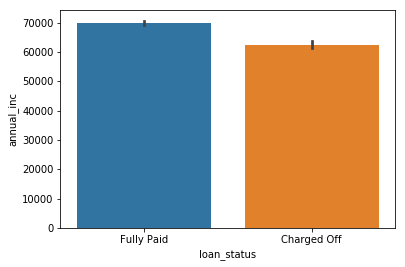

In [45]:
sns.barplot(x='loan_status',y = 'annual_inc',data=df)

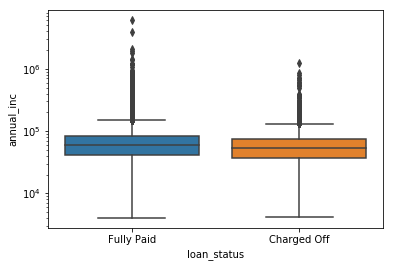

In [46]:
sns.boxplot(x='loan_status',y = 'annual_inc',data=df)
plt.yscale('log')
plt.show()

In [47]:
df['int_rate'].describe()

count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64

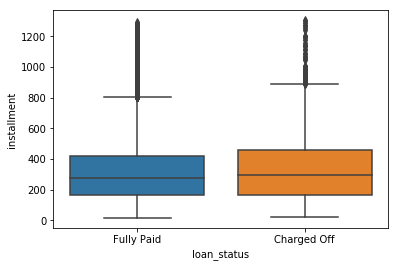

In [48]:
sns.boxplot(x='loan_status', y='installment', data=df)
plt.show()

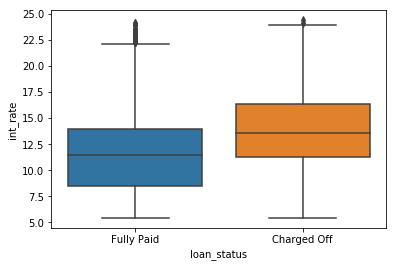

In [49]:
sns.boxplot(x='loan_status', y='int_rate', data=df)
plt.show()

Interest Rate was higher for ChargedOff(Default) than Fully Paid loans

##### Univarient analysis on categorical data


In [50]:
def barPlot(column_name, data_set):
  # set figure size for larger figure
  plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
  # specify hue="categorical_variable"
  sns.barplot(x=column_name, y='percentage', hue="loan_status", data=data_set)
  plt.show()

In [51]:
pub_rec_bankruptcies = df.groupby(['pub_rec_bankruptcies','loan_status']).size()
pub_rec_bankruptcies = pub_rec_bankruptcies.reset_index(name='values')
pub_rec_bankruptcies

,pub_rec_bankruptcies,loan_status,values
0,0.0,Charged Off,5141
1,0.0,Fully Paid,31097
2,1.0,Charged Off,366
3,1.0,Fully Paid,1271
4,2.0,Charged Off,2
5,2.0,Fully Paid,3


In [52]:
pub_rec_bankruptcies['percentage'] = 0
for n in range(0,len(pub_rec_bankruptcies),2):
    total = pub_rec_bankruptcies['values'][n] + pub_rec_bankruptcies['values'][n+1]
    pub_rec_bankruptcies['percentage'][n] = (pub_rec_bankruptcies['values'][n] / total)*100
    pub_rec_bankruptcies['percentage'][n+1] = (pub_rec_bankruptcies['values'][n+1] / total)*100
pub_rec_bankruptcies

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,pub_rec_bankruptcies,loan_status,values,percentage
0,0.0,Charged Off,5141,14
1,0.0,Fully Paid,31097,85
2,1.0,Charged Off,366,22
3,1.0,Fully Paid,1271,77
4,2.0,Charged Off,2,40
5,2.0,Fully Paid,3,60


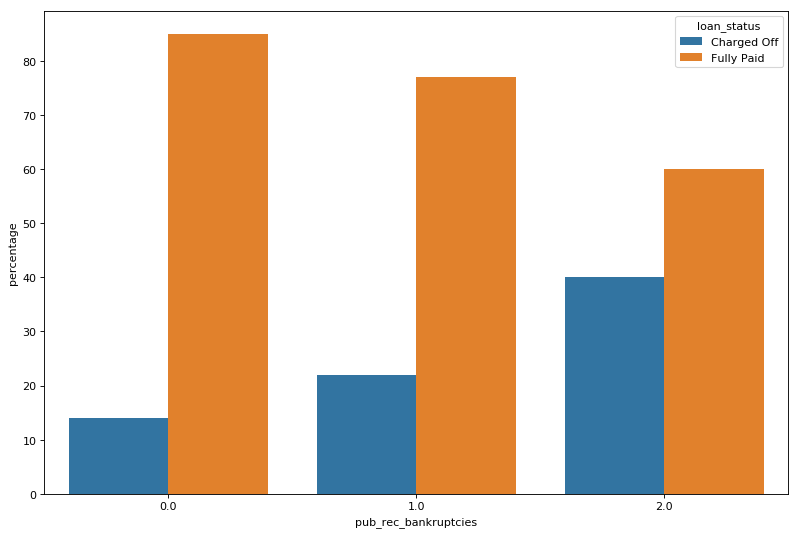

In [53]:
barPlot('pub_rec_bankruptcies', pub_rec_bankruptcies)

In [54]:
term = df.groupby(['term','loan_status']).size()
term = term.reset_index(name='values')
term

,term,loan_status,values
0,36,Charged Off,3227
1,36,Fully Paid,25869
2,60,Charged Off,2400
3,60,Fully Paid,7081


In [55]:
term['percentage'] = 0
for n in range(0,len(term),2):
    total = term['values'][n] + term['values'][n+1]
    term['percentage'][n] = (term['values'][n] / total)*100
    term['percentage'][n+1] = (term['values'][n+1] / total)*100
term

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,term,loan_status,values,percentage
0,36,Charged Off,3227,11
1,36,Fully Paid,25869,88
2,60,Charged Off,2400,25
3,60,Fully Paid,7081,74


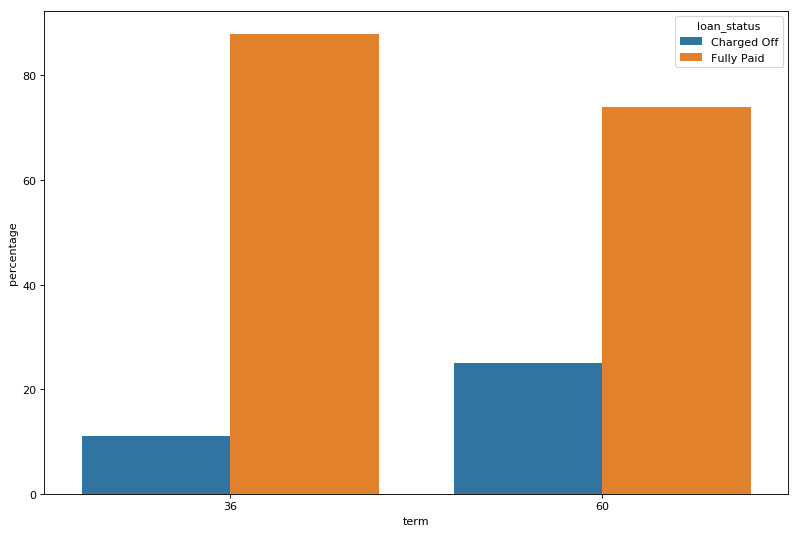

In [56]:
barPlot('term', term)

In [57]:
emp_length = df.groupby(['emp_length','loan_status']).size()
emp_length = emp_length.reset_index(name='values')
emp_length

,emp_length,loan_status,values
0,1 year,Charged Off,456
1,1 year,Fully Paid,2713
2,10+ years,Charged Off,1331
3,10+ years,Fully Paid,7157
4,2 years,Charged Off,567
5,2 years,Fully Paid,3724
6,3 years,Charged Off,555
7,3 years,Fully Paid,3457
8,4 years,Charged Off,462
9,4 years,Fully Paid,2880


In [58]:
emp_length['percentage'] = 0
for n in range(0,len(emp_length),2):
    total = emp_length['values'][n] + emp_length['values'][n+1]
    emp_length['percentage'][n] = (emp_length['values'][n] / total)*100
    emp_length['percentage'][n+1] = (emp_length['values'][n+1] / total)*100
emp_length

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,emp_length,loan_status,values,percentage
0,1 year,Charged Off,456,14
1,1 year,Fully Paid,2713,85
2,10+ years,Charged Off,1331,15
3,10+ years,Fully Paid,7157,84
4,2 years,Charged Off,567,13
5,2 years,Fully Paid,3724,86
6,3 years,Charged Off,555,13
7,3 years,Fully Paid,3457,86
8,4 years,Charged Off,462,13
9,4 years,Fully Paid,2880,86


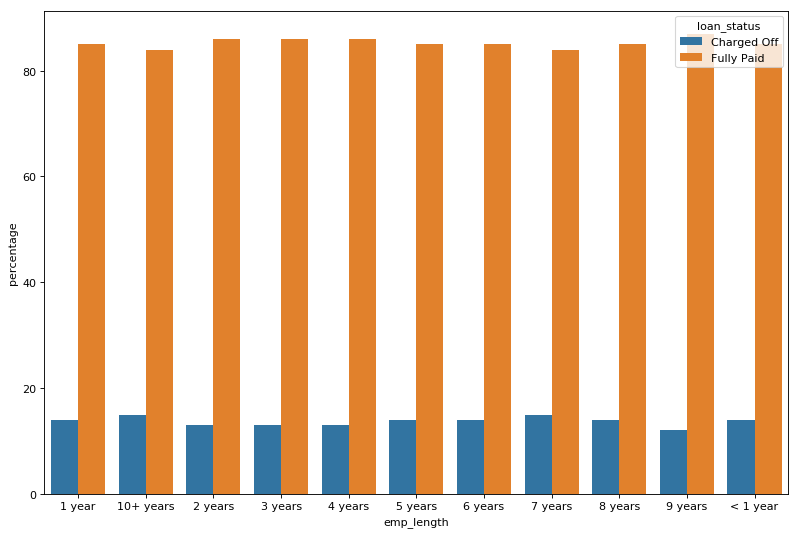

In [59]:
barPlot('emp_length', emp_length)

In [60]:
home_ownership = df.groupby(['home_ownership','loan_status']).size()
home_ownership = home_ownership.reset_index(name='values')
home_ownership

,home_ownership,loan_status,values
0,MORTGAGE,Charged Off,2327
1,MORTGAGE,Fully Paid,14694
2,OTHER,Charged Off,18
3,OTHER,Fully Paid,80
4,OWN,Charged Off,443
5,OWN,Fully Paid,2532
6,RENT,Charged Off,2839
7,RENT,Fully Paid,15641


In [61]:
home_ownership['percentage'] = 0
for n in range(0,len(home_ownership),2):
    total = home_ownership['values'][n] + home_ownership['values'][n+1]
    home_ownership['percentage'][n] = (home_ownership['values'][n] / total)*100
    home_ownership['percentage'][n+1] = (home_ownership['values'][n+1] / total)*100

home_ownership

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,home_ownership,loan_status,values,percentage
0,MORTGAGE,Charged Off,2327,13
1,MORTGAGE,Fully Paid,14694,86
2,OTHER,Charged Off,18,18
3,OTHER,Fully Paid,80,81
4,OWN,Charged Off,443,14
5,OWN,Fully Paid,2532,85
6,RENT,Charged Off,2839,15
7,RENT,Fully Paid,15641,84


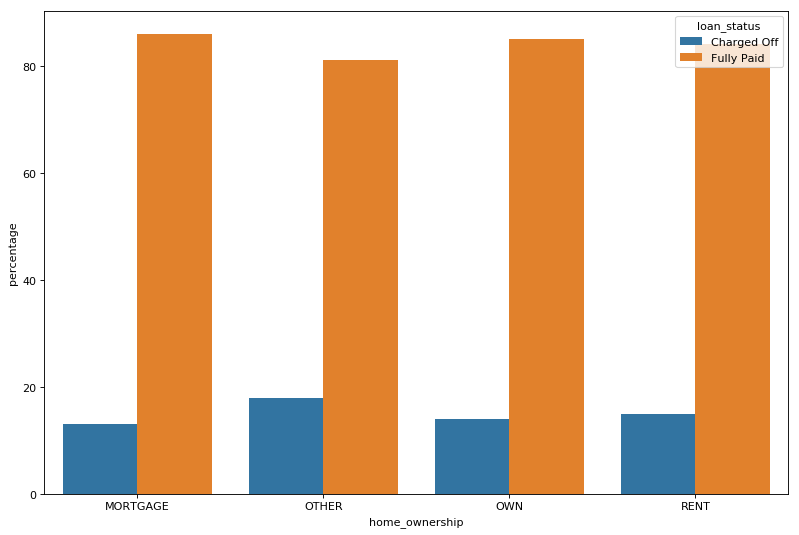

In [62]:
barPlot('home_ownership', home_ownership)

In [63]:
verification_status = df.groupby(['verification_status','loan_status']).size()
verification_status = verification_status.reset_index(name='values')
verification_status

,verification_status,loan_status,values
0,Not Verified,Charged Off,2142
1,Not Verified,Fully Paid,14552
2,Source Verified,Charged Off,1434
3,Source Verified,Fully Paid,8243
4,Verified,Charged Off,2051
5,Verified,Fully Paid,10155


In [64]:
verification_status['percentage'] = 0
for n in range(0,len(verification_status),2):
    total = verification_status['values'][n] + verification_status['values'][n+1]
    verification_status['percentage'][n] = (verification_status['values'][n] / total)*100
    verification_status['percentage'][n+1] = (verification_status['values'][n+1] / total)*100

verification_status

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,verification_status,loan_status,values,percentage
0,Not Verified,Charged Off,2142,12
1,Not Verified,Fully Paid,14552,87
2,Source Verified,Charged Off,1434,14
3,Source Verified,Fully Paid,8243,85
4,Verified,Charged Off,2051,16
5,Verified,Fully Paid,10155,83


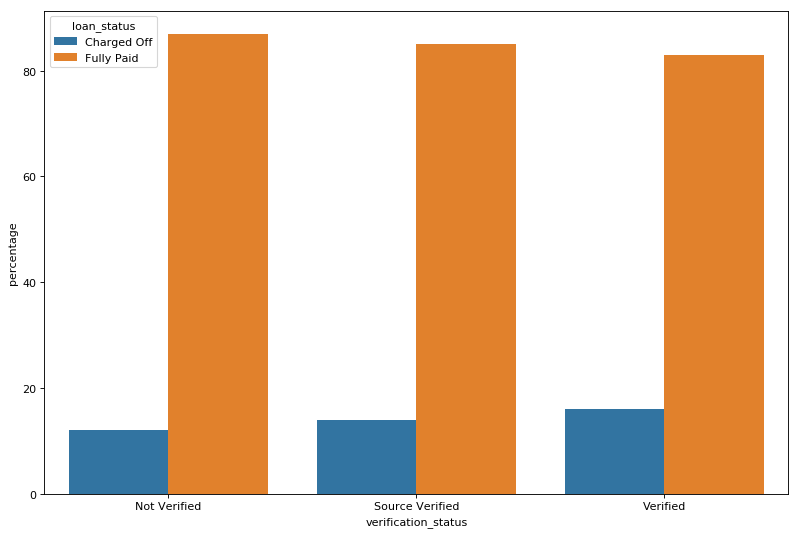

In [65]:
barPlot('verification_status', verification_status)

In [66]:
purpose = df.groupby(['purpose','loan_status']).size()
purpose = purpose.reset_index(name='values')
purpose

,purpose,loan_status,values
0,car,Charged Off,160
1,car,Fully Paid,1339
2,credit_card,Charged Off,542
3,credit_card,Fully Paid,4485
4,debt_consolidation,Charged Off,2767
5,debt_consolidation,Fully Paid,15288
6,educational,Charged Off,56
7,educational,Fully Paid,269
8,home_improvement,Charged Off,347
9,home_improvement,Fully Paid,2528


In [67]:
purpose['percentage'] = 0
for n in range(0,len(purpose),2):
    total = purpose['values'][n] + purpose['values'][n+1]
    purpose['percentage'][n] = (purpose['values'][n] / total)*100
    purpose['percentage'][n+1] = (purpose['values'][n+1] / total)*100

purpose

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,purpose,loan_status,values,percentage
0,car,Charged Off,160,10
1,car,Fully Paid,1339,89
2,credit_card,Charged Off,542,10
3,credit_card,Fully Paid,4485,89
4,debt_consolidation,Charged Off,2767,15
5,debt_consolidation,Fully Paid,15288,84
6,educational,Charged Off,56,17
7,educational,Fully Paid,269,82
8,home_improvement,Charged Off,347,12
9,home_improvement,Fully Paid,2528,87


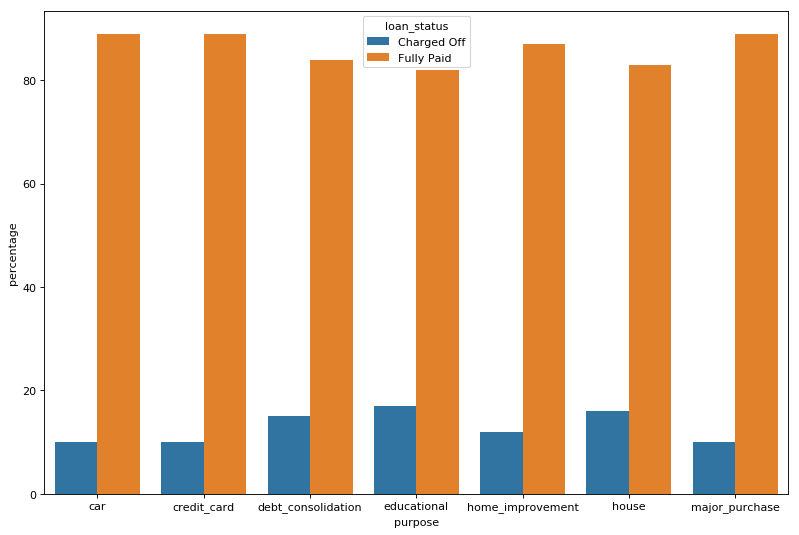

In [68]:
# set figure size for larger figure
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

sns.barplot(x='purpose', y='percentage', hue="loan_status", data=purpose.iloc[0:14])
plt.show()

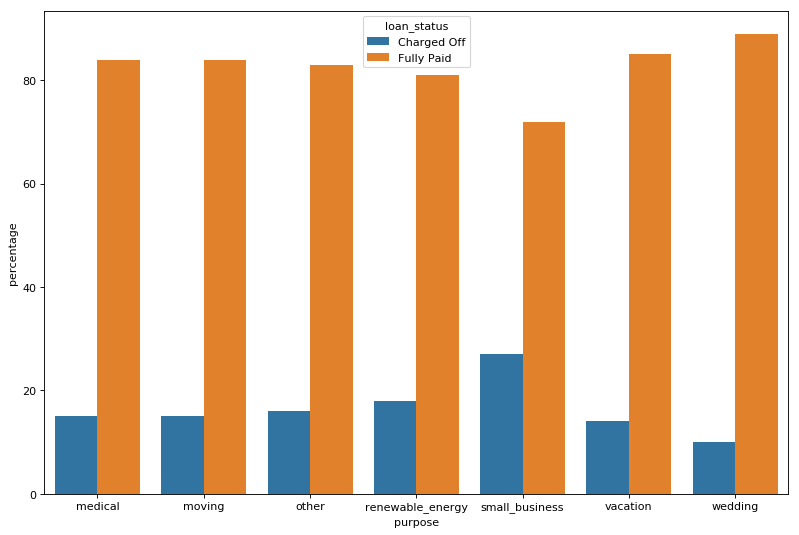

In [69]:
# set figure size for larger figure
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

sns.barplot(x='purpose', y='percentage', hue="loan_status", data=purpose.iloc[14:28])
plt.show()

### Bivarient Analysis

In [70]:
def bivarientPlot(x_var, y_var, use_log = False):
  # set figure size for larger figure
  plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

  # specify hue="categorical_variable"
  sns.boxplot(x=x_var, y=y_var, hue="loan_status", data=df)
  if use_log : plt.yscale('log')
  plt.show()

##### Bivarient on loan_stats and term

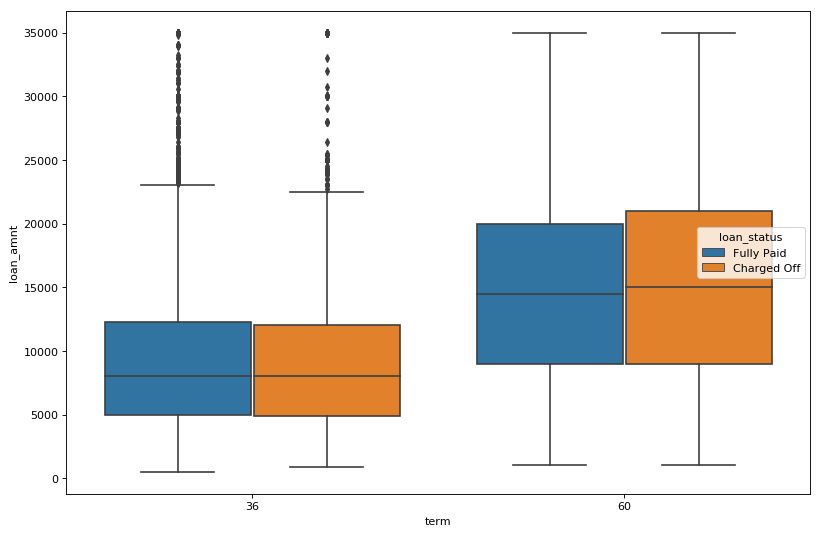

In [71]:
bivarientPlot('term', 'loan_amnt')

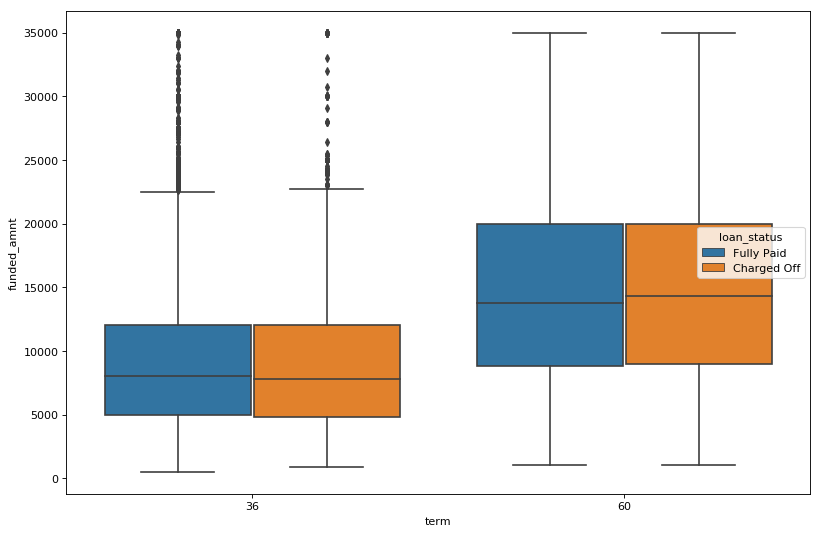

In [72]:
bivarientPlot('term', 'funded_amnt')

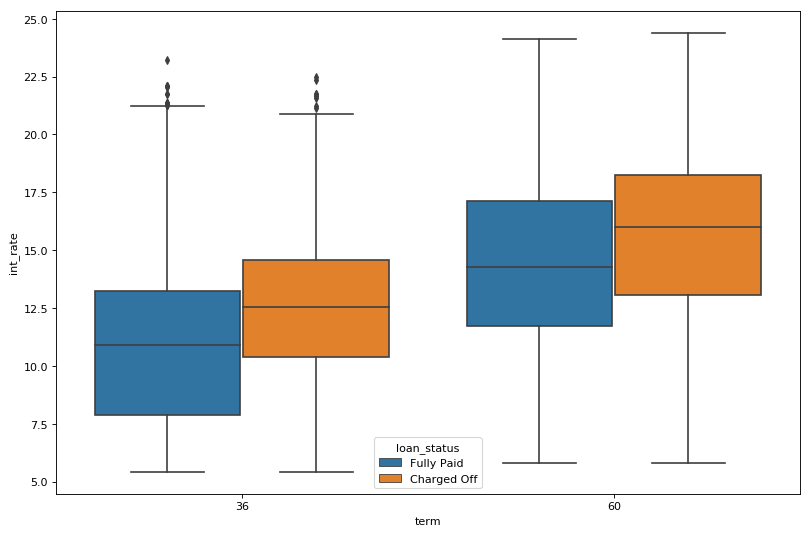

In [73]:
bivarientPlot('term', 'int_rate')

Significant difference can be seen in int_rate vs term which suggest that for 36 and 60 months of terms, loan with higher interest rate are highly likely to default.

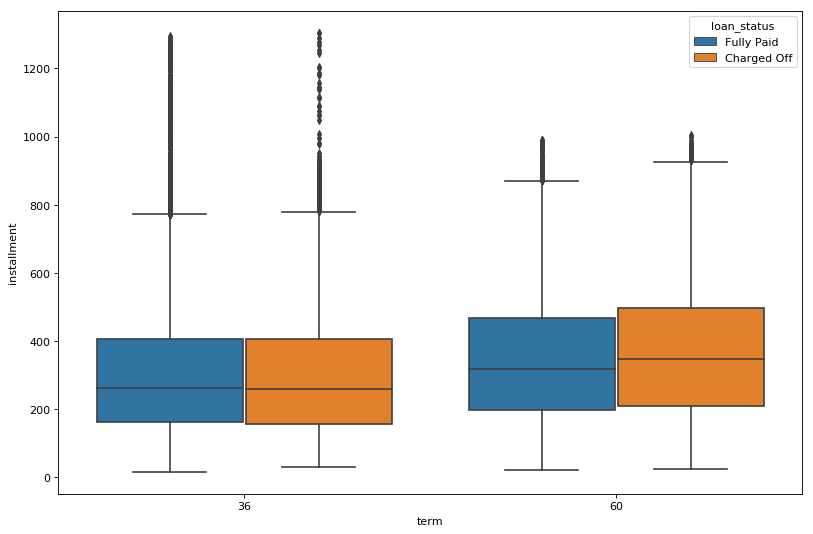

In [74]:
bivarientPlot('term', 'installment')

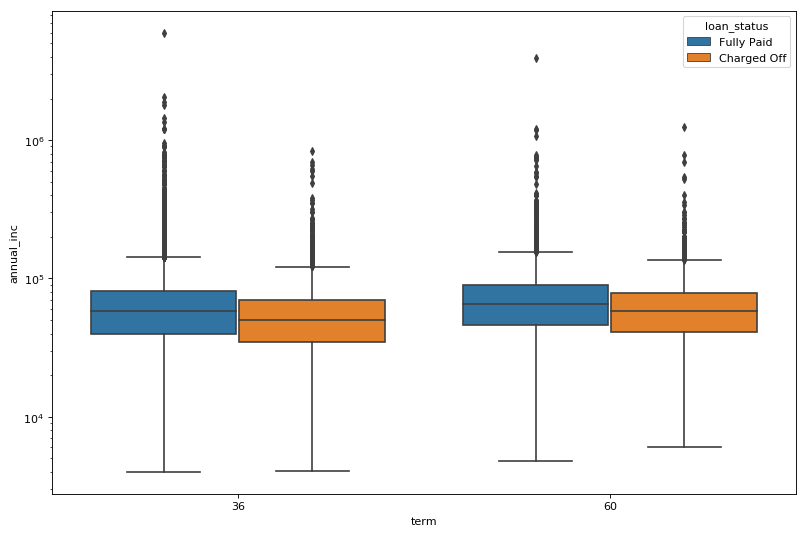

In [75]:
bivarientPlot('term', 'annual_inc', True)

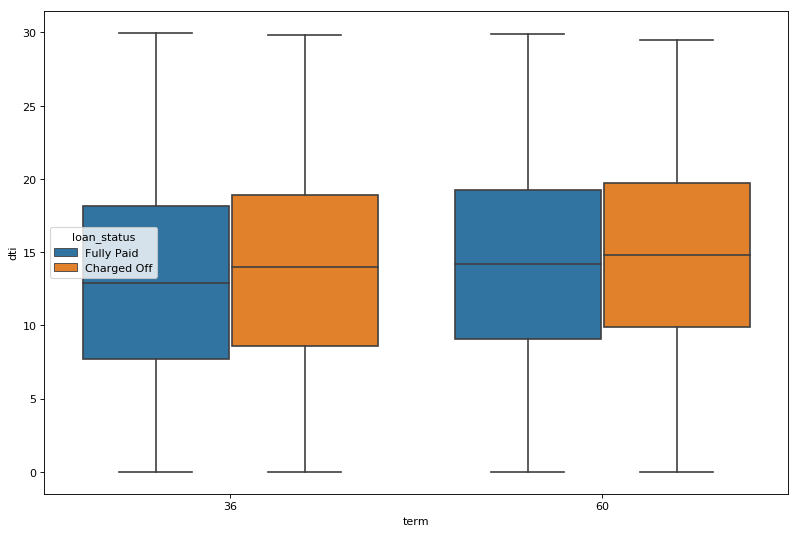

In [76]:
bivarientPlot('term', 'dti')

##### Bivarient analysis for loan_status and grade

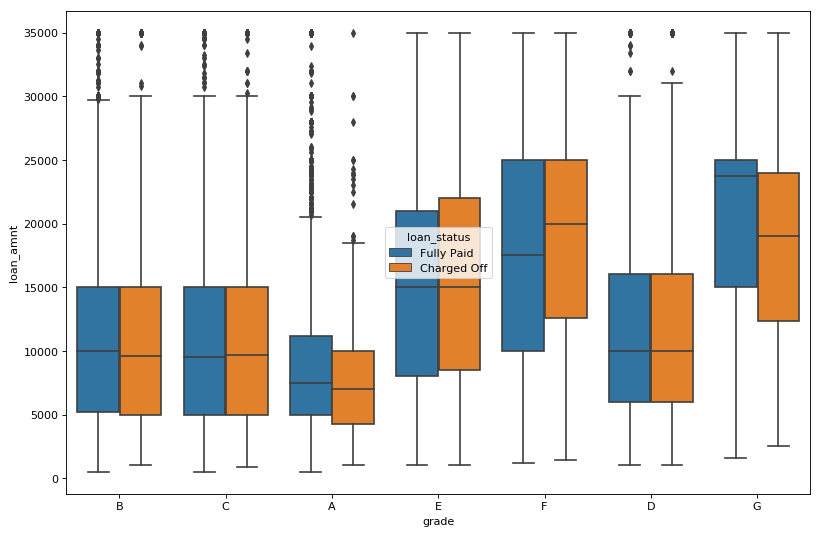

In [77]:
bivarientPlot('grade', 'loan_amnt')

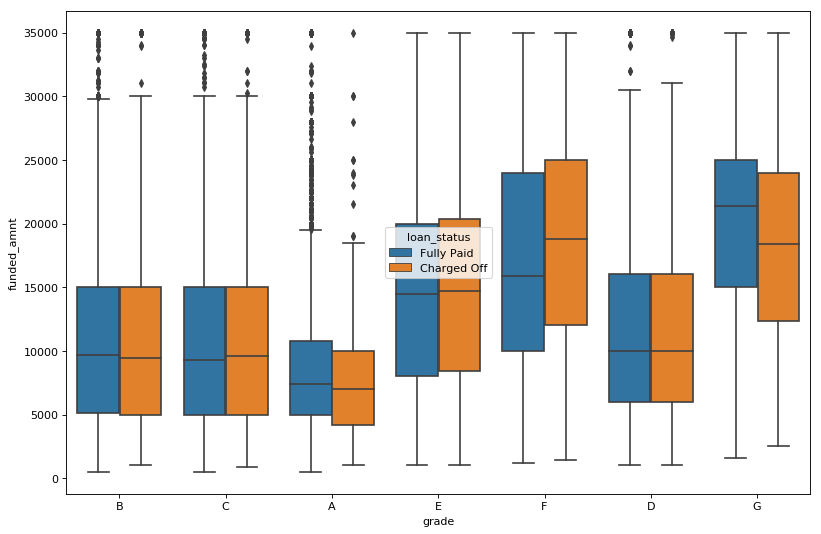

In [78]:
bivarientPlot('grade', 'funded_amnt')

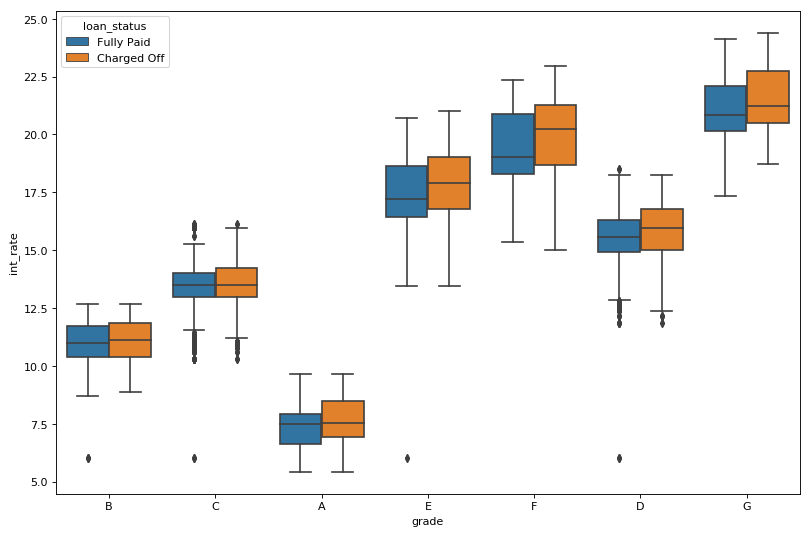

In [79]:
bivarientPlot('grade', 'int_rate')

A difference can be seen in int_rate vs garde for grades A, D, E, F and G. It suggest that for garde A, C, D, E, F, and G loan with higher interest rate are highly likely to default.

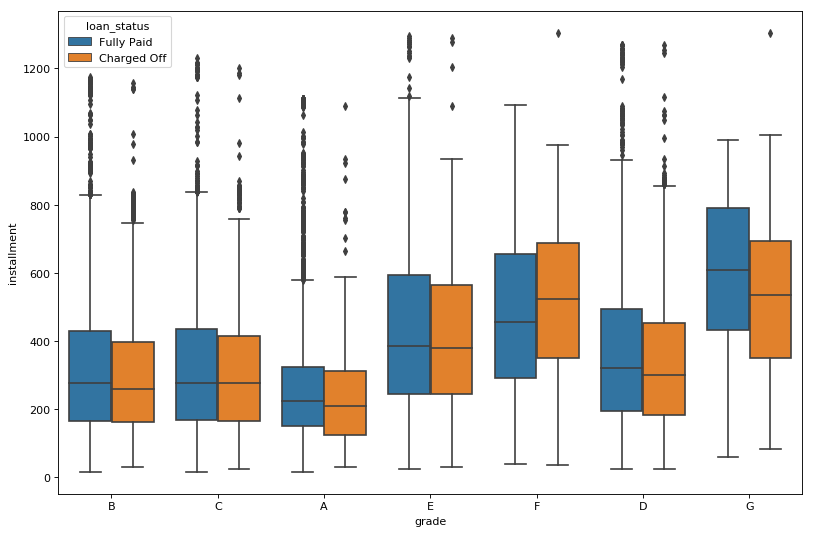

In [80]:
bivarientPlot('grade', 'installment')

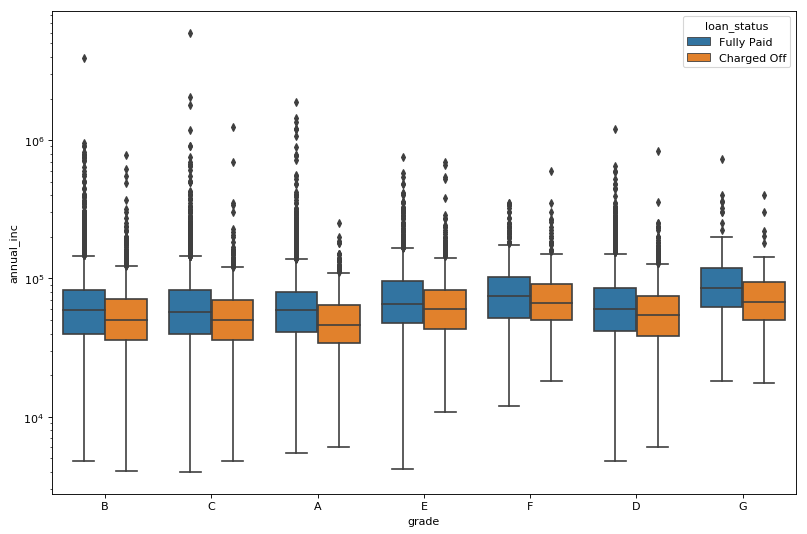

In [81]:
bivarientPlot('grade', 'annual_inc', True)

A difference can be seen in annual_inc vs garde for employees all grades. It suggest that employess with less annual increase are highly likely to default.

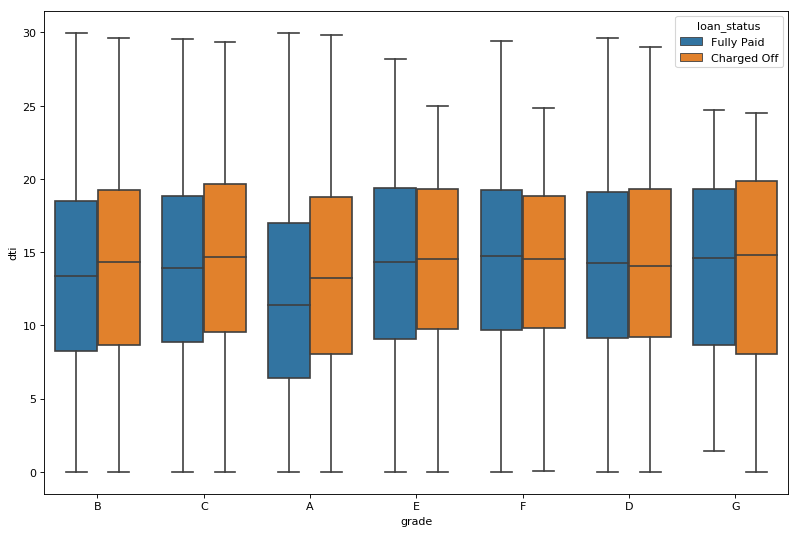

In [82]:
bivarientPlot('grade', 'dti')

##### Bivarient analysis for loan_status and emp_length

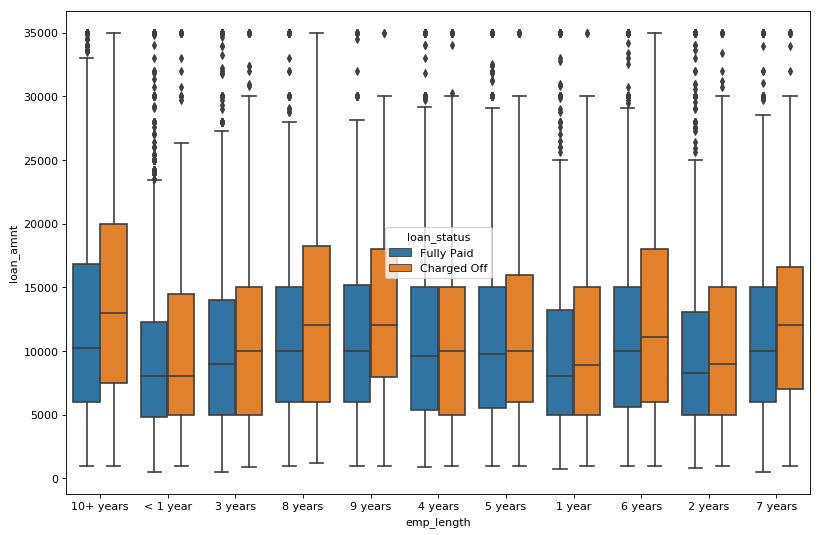

In [83]:
bivarientPlot('emp_length', 'loan_amnt')

A difference can be seen in loan_amnt vs emp_length plot which suggests that people with experience more than 7 years and higher loan amount are more likely to default.

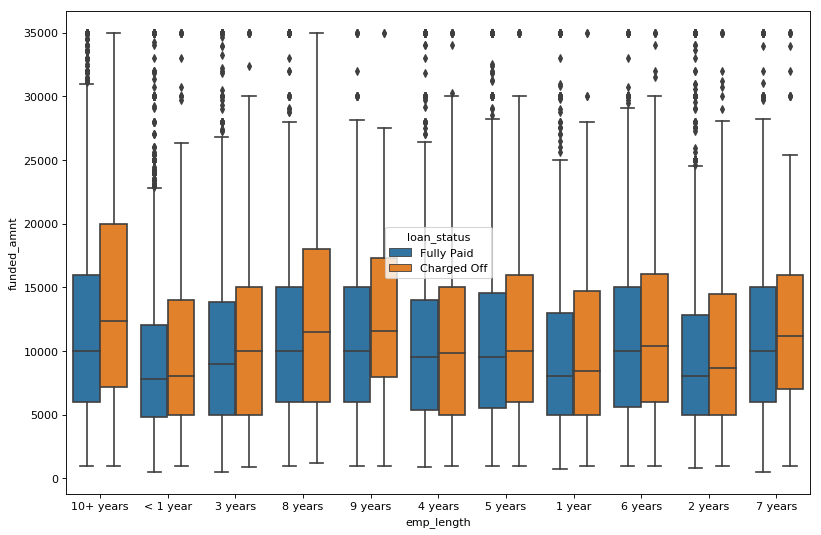

In [84]:
bivarientPlot('emp_length', 'funded_amnt')

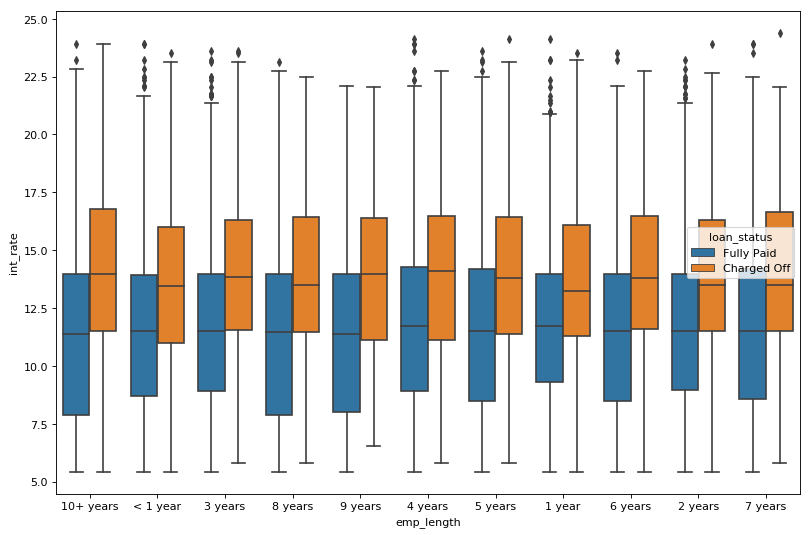

In [85]:
bivarientPlot('emp_length', 'int_rate')

Significant difference can be seen in int_rate vs emp_length which suggest that irrespective of employee working experience, loan with higher interest rate are highly likely to default.

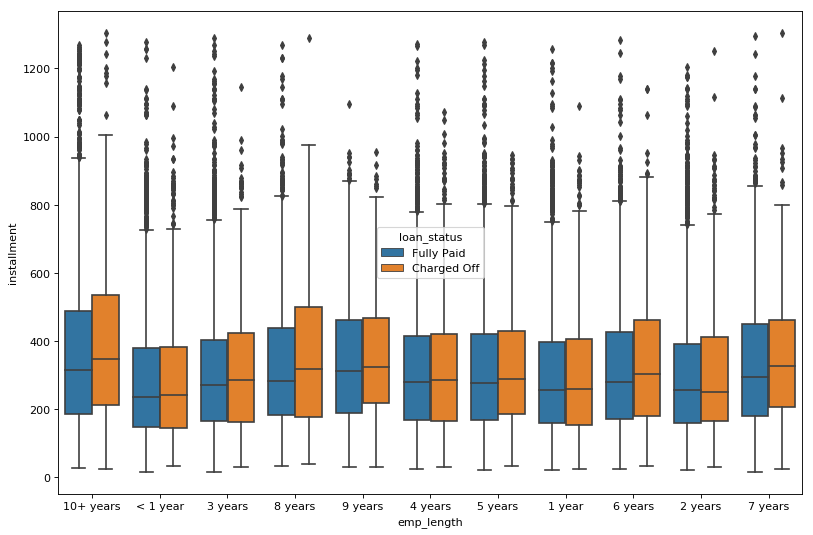

In [86]:
bivarientPlot('emp_length', 'installment')

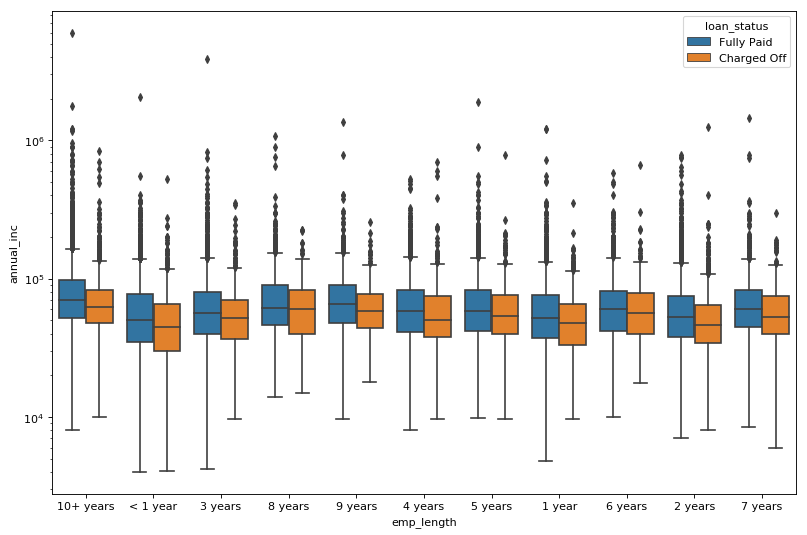

In [87]:
bivarientPlot('emp_length', 'annual_inc', True)

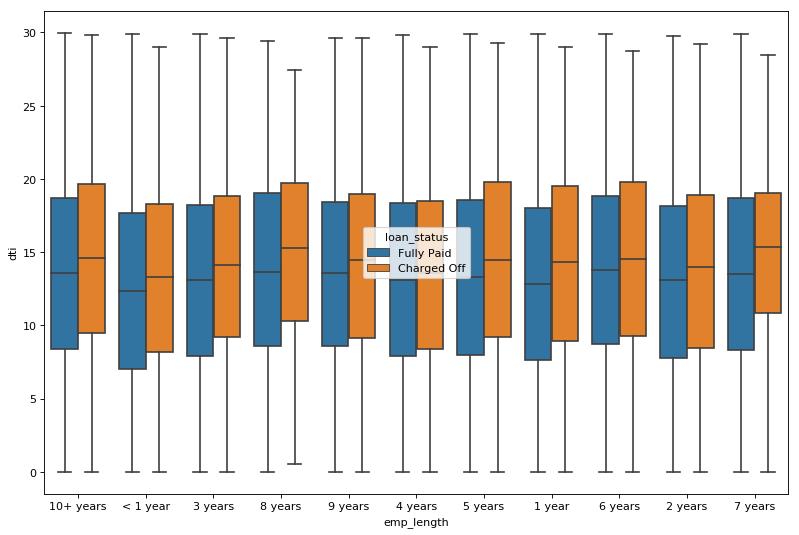

In [88]:
bivarientPlot('emp_length', 'dti')

##### Bivarient analysis for loan_status and home_ownership

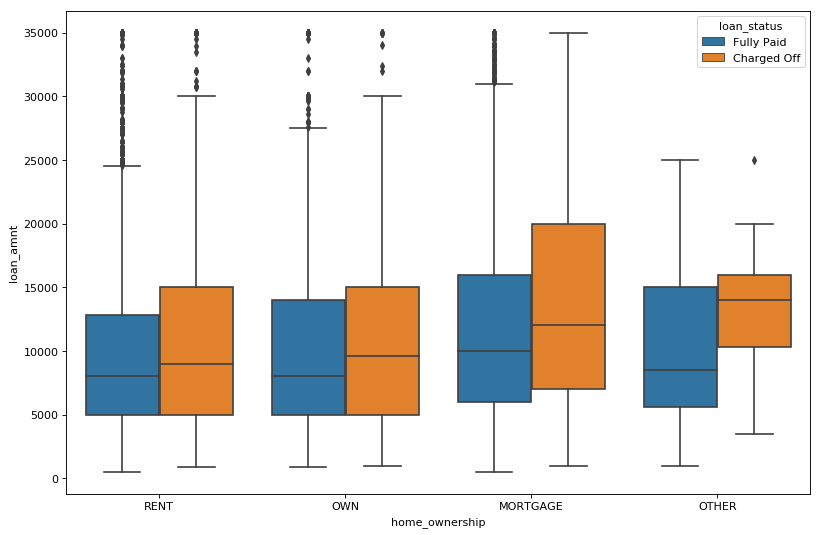

In [89]:
bivarientPlot('home_ownership', 'loan_amnt')

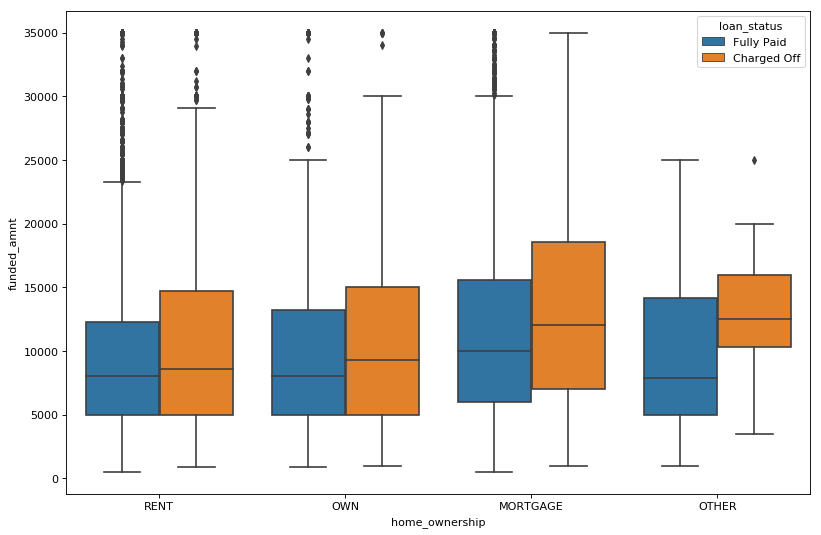

In [90]:
bivarientPlot('home_ownership', 'funded_amnt')

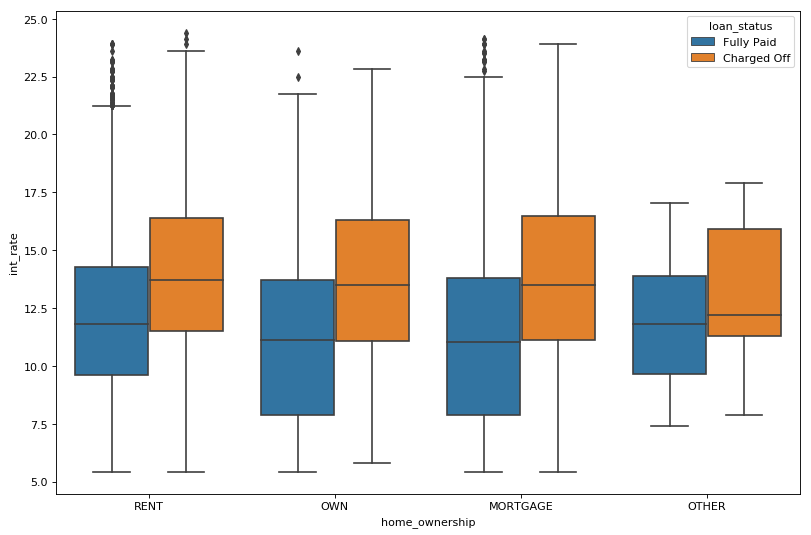

In [91]:
bivarientPlot('home_ownership', 'int_rate')

Significant difference can only be seen in int_rate vs home_owneship which suggest irrespective of home own by the borrowers, loan with higher interest rate are highly likely to default.

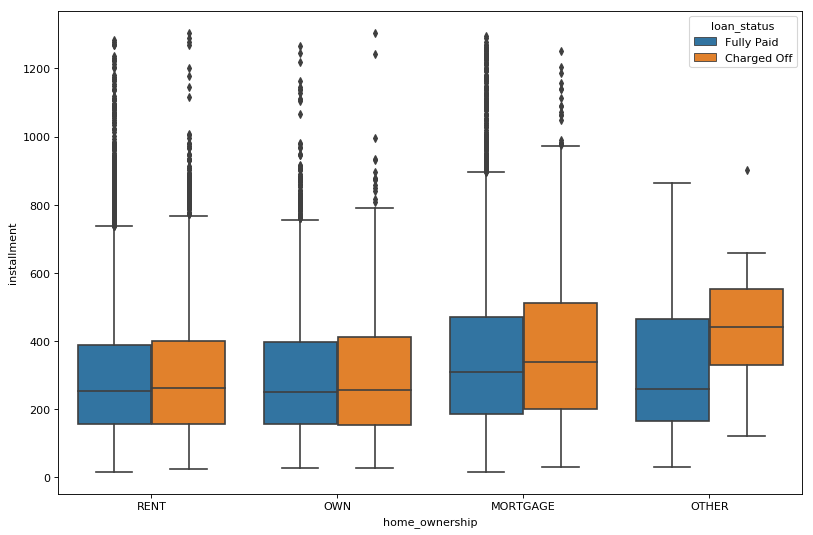

In [92]:
bivarientPlot('home_ownership', 'installment')

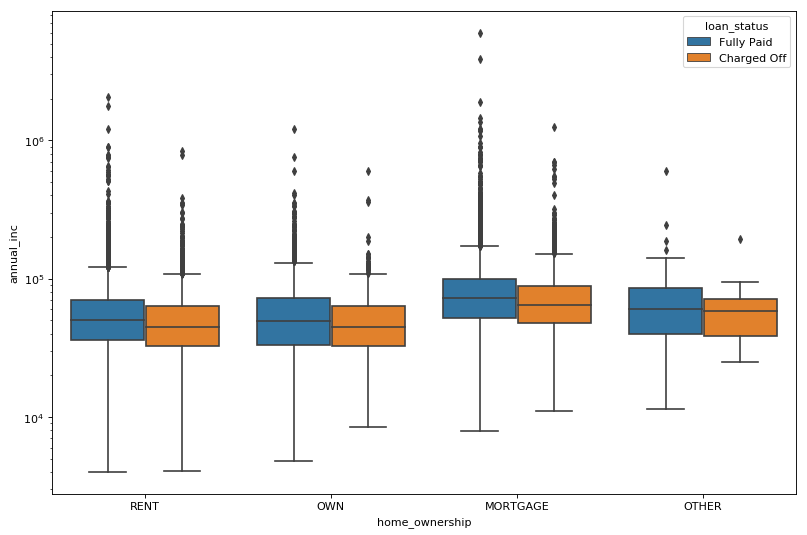

In [93]:
bivarientPlot('home_ownership', 'annual_inc', True)

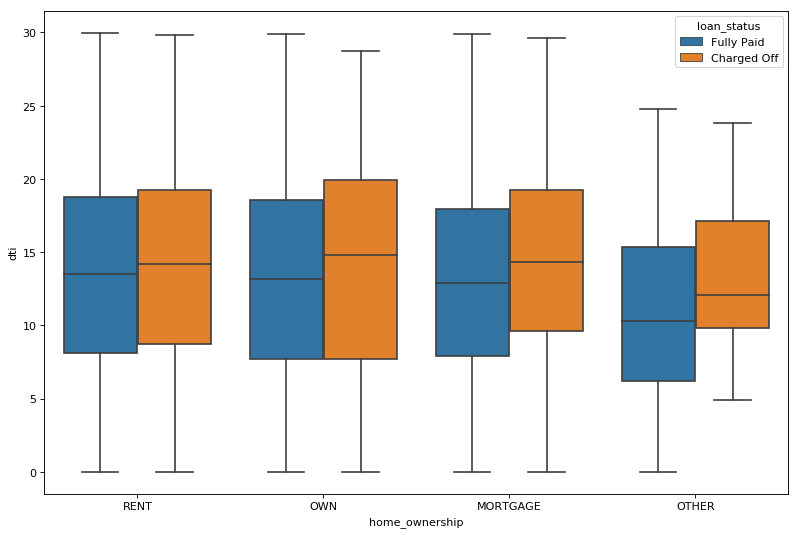

In [94]:
bivarientPlot('home_ownership', 'dti')

##### Bivarient analysis for loan_status and verification_status

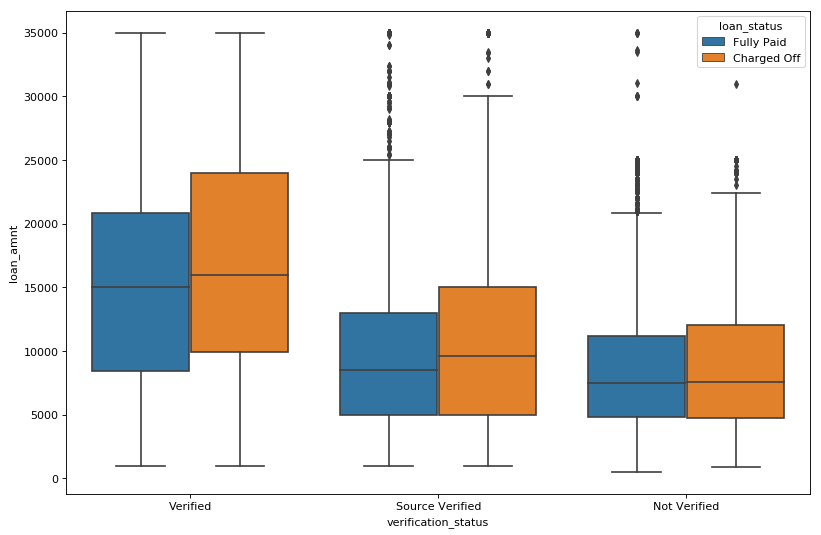

In [95]:
bivarientPlot('verification_status', 'loan_amnt')

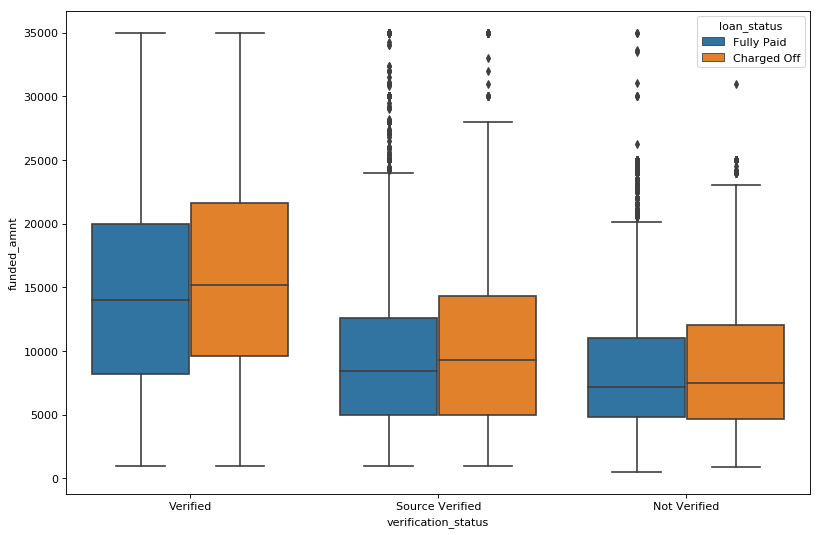

In [96]:
bivarientPlot('verification_status', 'funded_amnt')

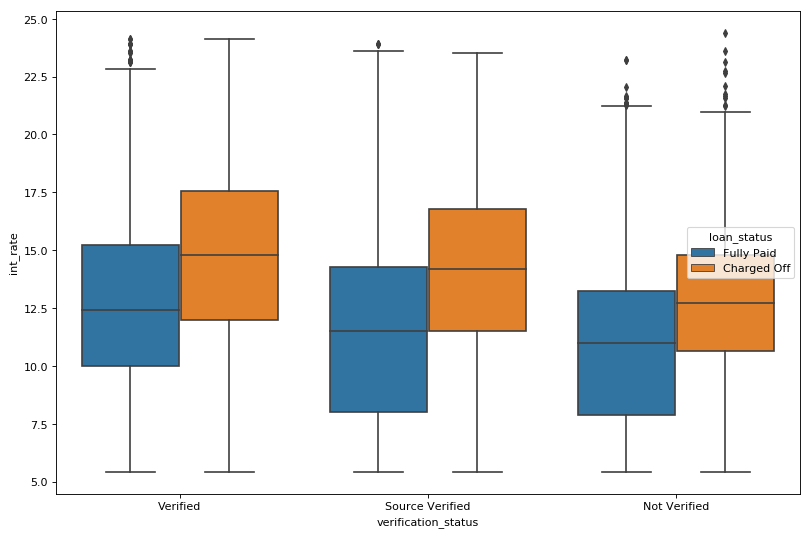

In [97]:
bivarientPlot('verification_status', 'int_rate')

Significant difference can only be seen in int_rate vs verification_status which suggest that for any type of verification status, loan with higher interest rate are highly likely to default.

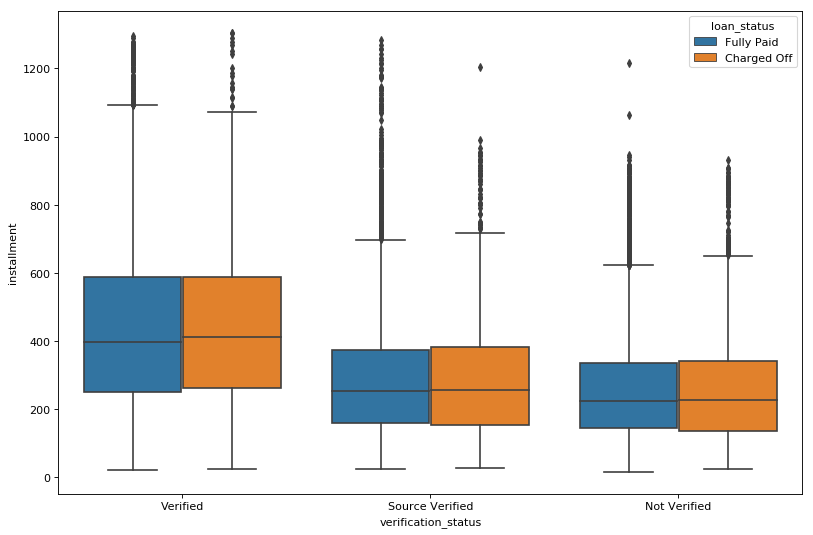

In [98]:
bivarientPlot('verification_status', 'installment')

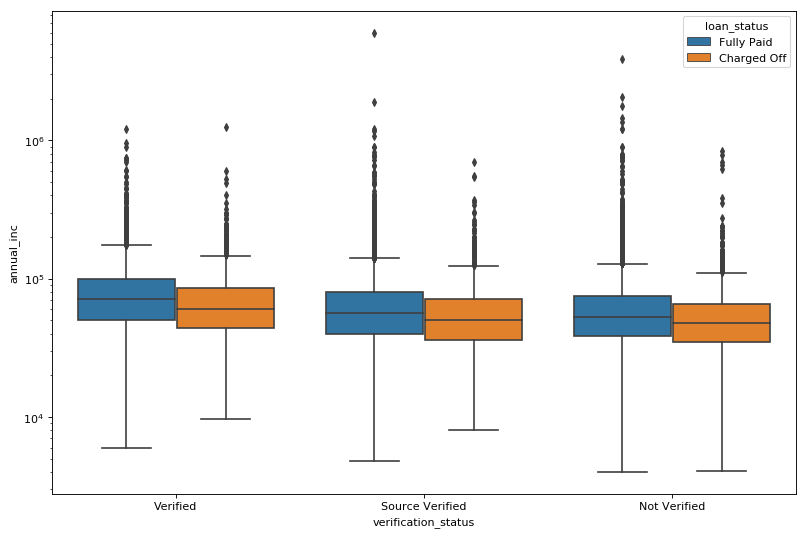

In [99]:
bivarientPlot('verification_status', 'annual_inc', True)

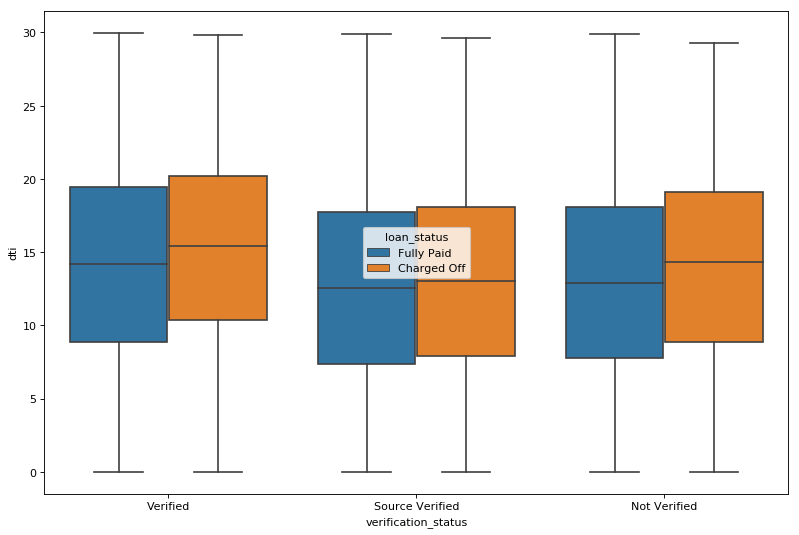

In [100]:
bivarientPlot('verification_status', 'dti')

##### Bivarient analysis for loan_status and purpose

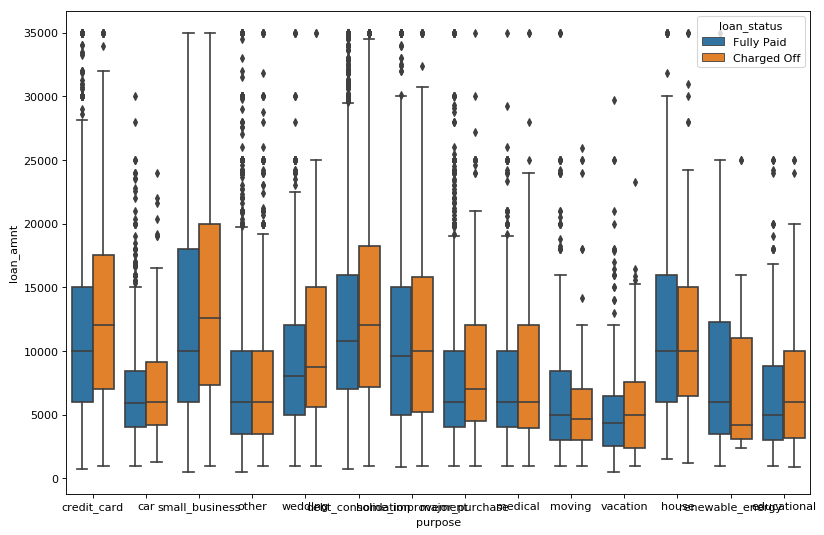

In [101]:
bivarientPlot('purpose', 'loan_amnt')

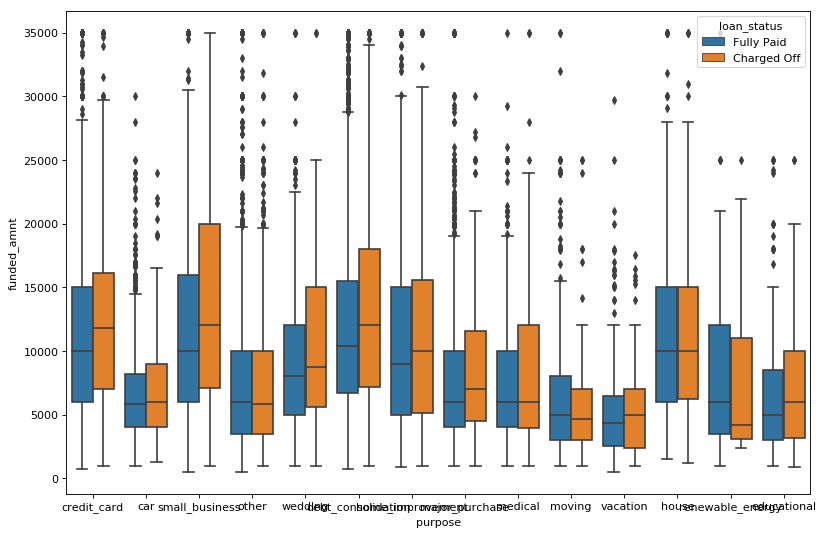

In [102]:
bivarientPlot('purpose', 'funded_amnt')

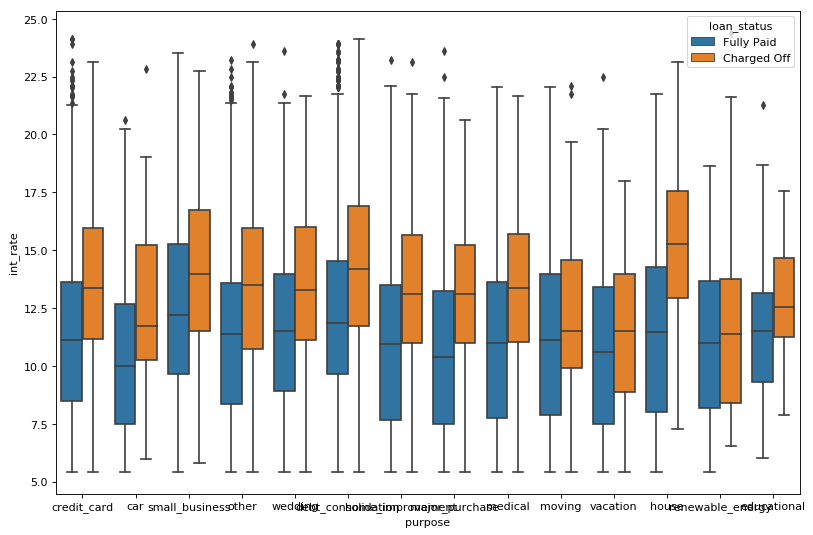

In [103]:
bivarientPlot('purpose', 'int_rate')

A significant difference can be seen in int_rate vs purpose plot which suggests that loan with higher intrest rate irrespective any purpose  are less likely to paid off fully.

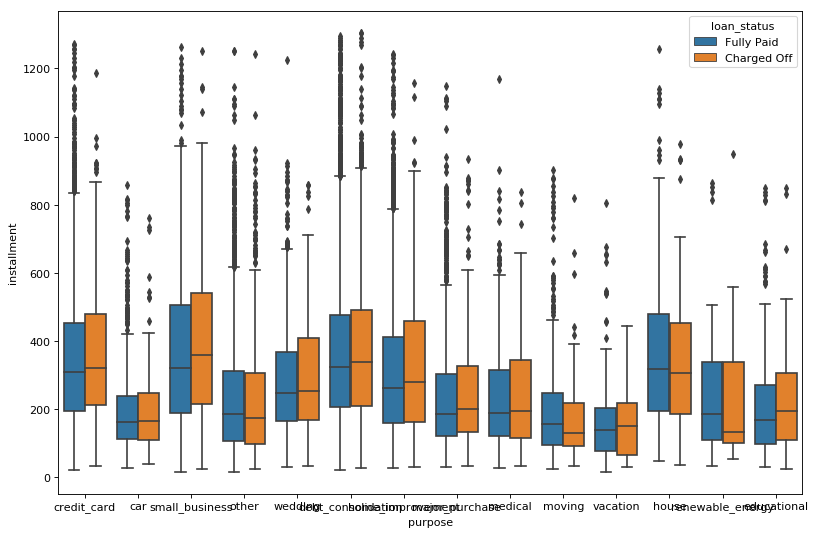

In [104]:
bivarientPlot('purpose', 'installment')

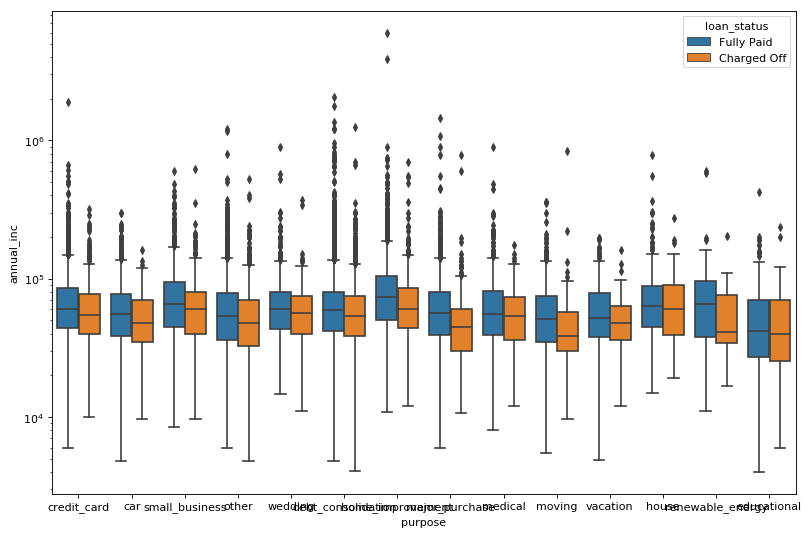

In [105]:
bivarientPlot('purpose', 'annual_inc', True)

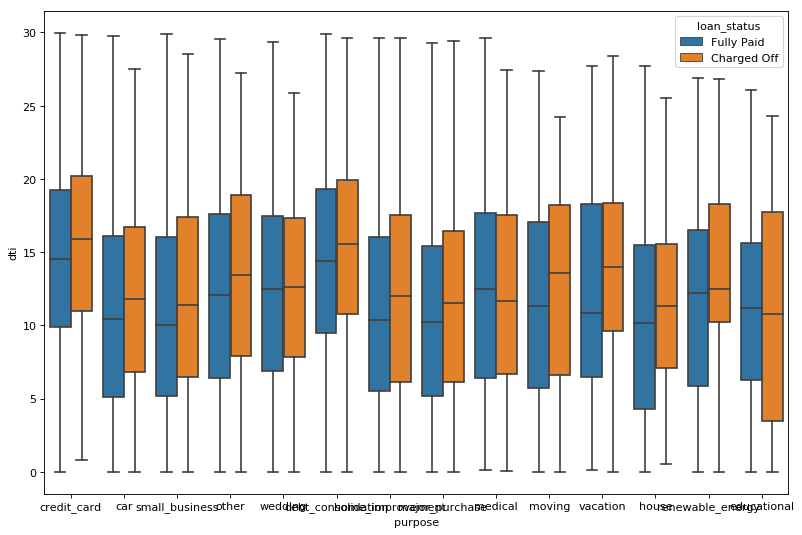

In [106]:
bivarientPlot('purpose', 'dti')

##### Bivarient analysis for loan_status and pub_rec_bankruptcies

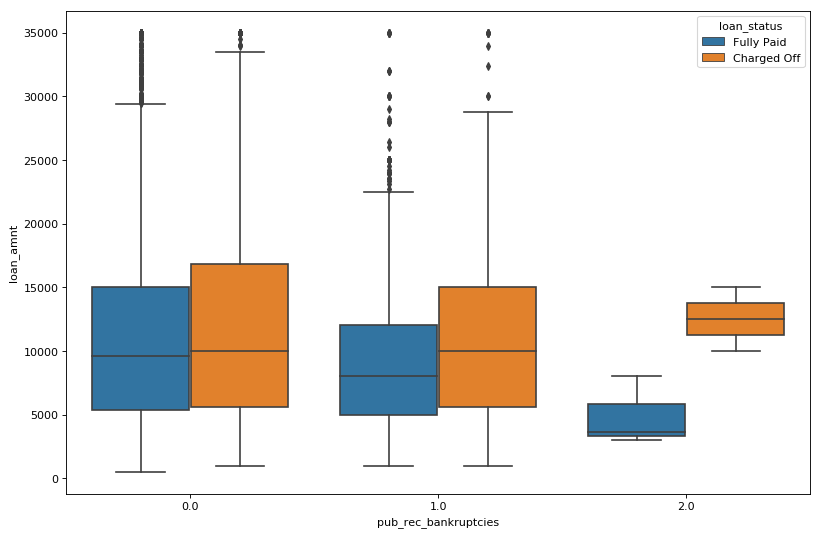

In [107]:
bivarientPlot('pub_rec_bankruptcies', 'loan_amnt')

A significant difference can be seen in loan_amnt vs pub_rec_bankruptcies plot which suggests that people with 2 publically record bankruptcies and with high loan amount are more likely to default.

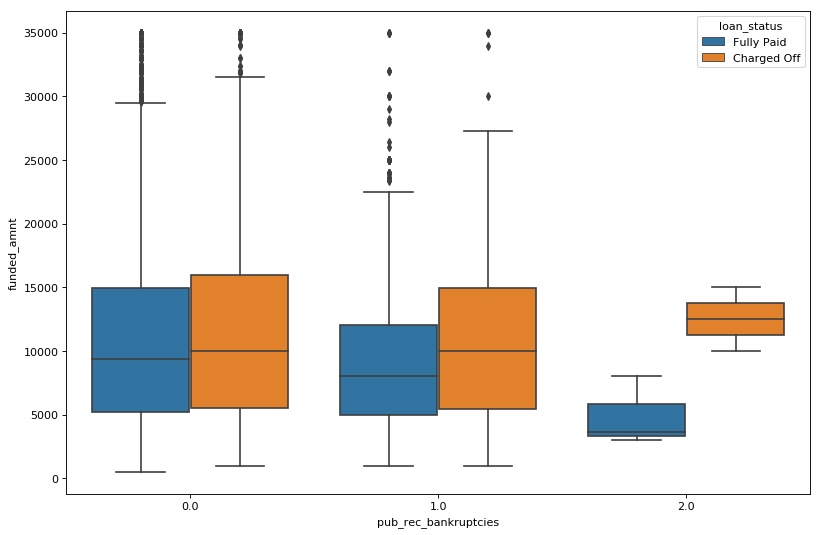

In [108]:
bivarientPlot('pub_rec_bankruptcies', 'funded_amnt')

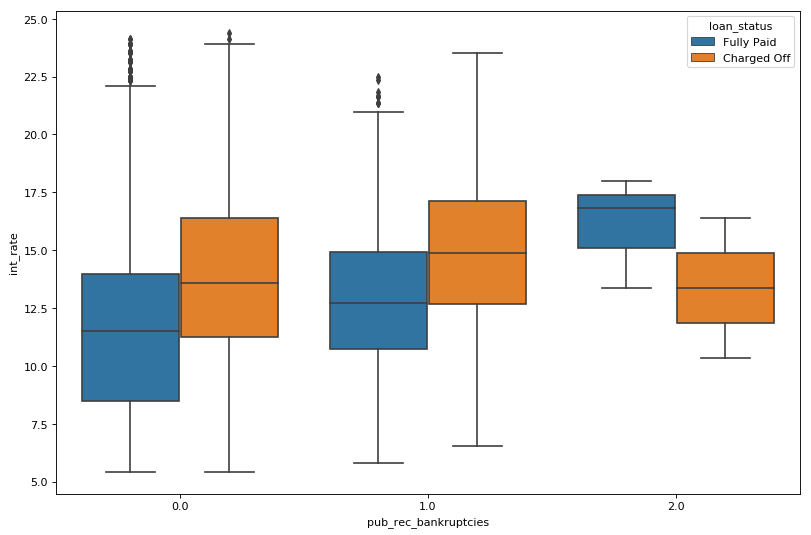

In [109]:
bivarientPlot('pub_rec_bankruptcies', 'int_rate')

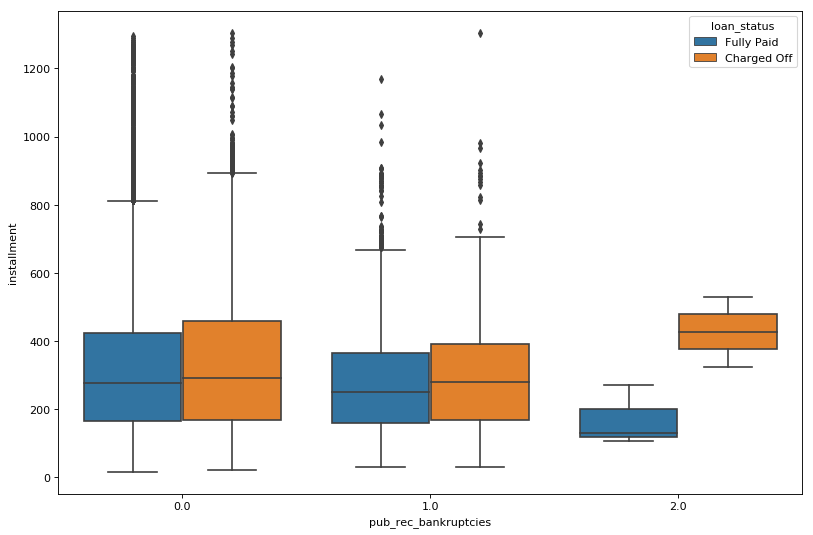

In [110]:
bivarientPlot('pub_rec_bankruptcies', 'installment')

A significant difference can be seen in installment vs pub_rec_bankruptcies plot which suggests that people with 2 publically record bankruptcies and with high installment amount per month are more likely to default.

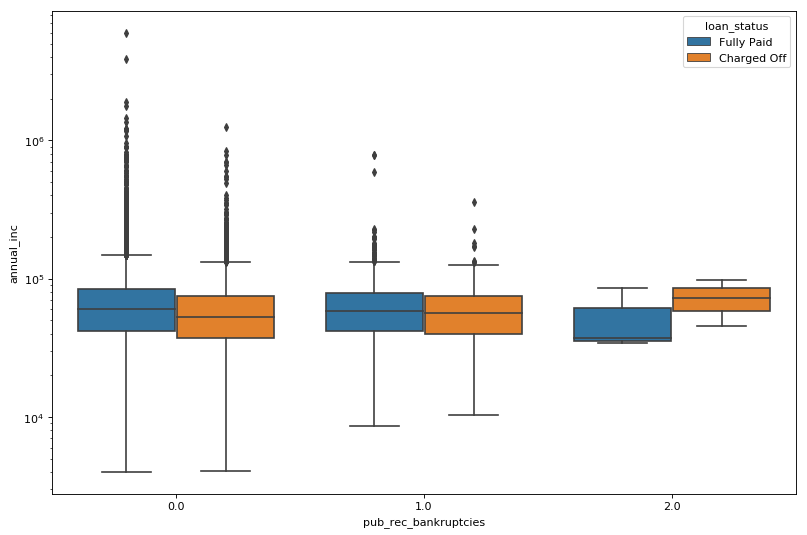

In [111]:
bivarientPlot('pub_rec_bankruptcies', 'annual_inc', True)

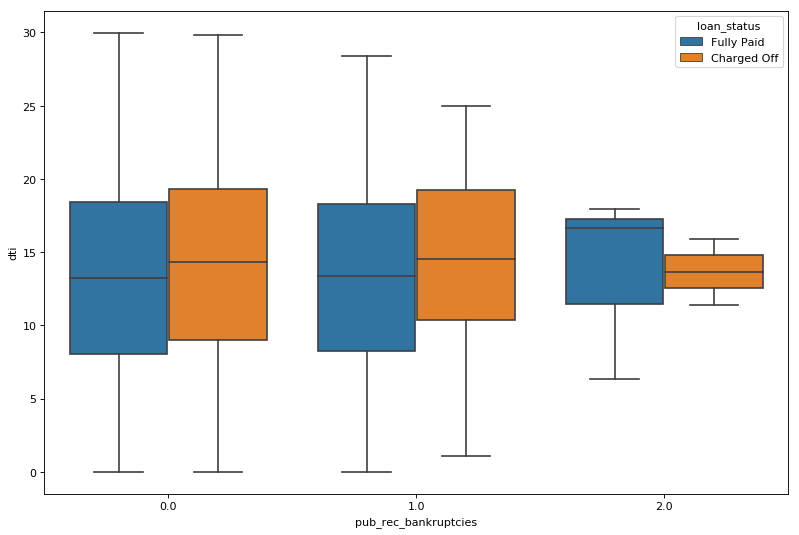

In [112]:
bivarientPlot('pub_rec_bankruptcies', 'dti')

##### Scatter Plot